The Split-Apply-Combine Paradigm

In [1]:
import pandas as pd

# This overrides how Colab displays Pandas Series.
#from google.colab import _reprs
#_reprs.disable_pandas_series_repr()
df = pd.read_csv("https://datasci112.stanford.edu/data/flights_nyc_20131116.csv")
df

carrier  flight origin dest  dep_delay
0        US    1895    EWR  CLT       -5.0
1        UA    1014    LGA  IAH       -3.0
2        AA    2243    JFK  MIA        2.0
3        UA     303    JFK  SFO       -8.0
4        US     795    LGA  PHL       -8.0
..      ...     ...    ...  ...        ...
573      B6     745    JFK  PSE       -3.0
574      B6     839    JFK  BQN        0.0
575      UA     360    EWR  PBI        NaN
576      US    1946    EWR  CLT        NaN
577      US    2142    LGA  BOS        NaN

[578 rows x 5 columns]

np.float64(2.0469565217391303)

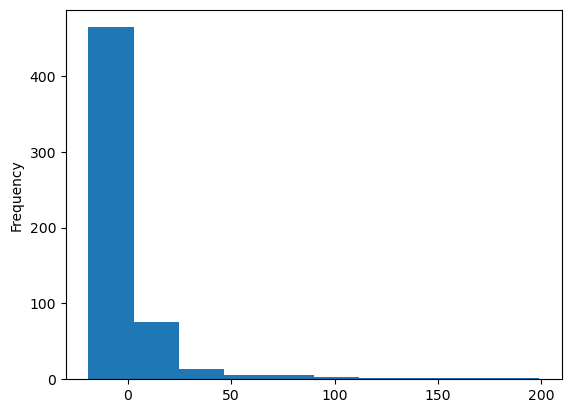

In [2]:
df["dep_delay"].plot.hist()
df["dep_delay"].mean()

In [3]:
(df['dep_delay'] < 5).mean()

np.float64(0.8252595155709342)

In [4]:
df['carrier'].unique()

array(['US', 'UA', 'AA', 'DL', 'B6', 'EV'], dtype=object)

Boolean Masking

In [5]:
df.groupby('carrier')['dep_delay'].mean()

carrier
AA   -1.337838
B6    1.537879
DL    3.295238
EV    1.247619
UA    5.590164
US   -2.324324
Name: dep_delay, dtype: float64

In [6]:
df["carrier"] == "UA"

0      False
1       True
2      False
3       True
4      False
       ...  
573    False
574    False
575     True
576    False
577    False
Name: carrier, Length: 578, dtype: bool

In [7]:
(df["carrier"] == "UA").sum()

np.int64(123)

In [8]:
(df["carrier"] == "UA").mean()

np.float64(0.21280276816608998)

In [9]:
df[df["carrier"] == "UA"]

carrier  flight origin dest  dep_delay
1        UA    1014    LGA  IAH       -3.0
3        UA     303    JFK  SFO       -8.0
8        UA    1187    LGA  ORD       -5.0
9        UA     258    EWR  MCO       -2.0
15       UA     665    EWR  SFO       -1.0
..      ...     ...    ...  ...        ...
537      UA    1631    EWR  IAH       -3.0
549      UA    1409    EWR  TPA       -1.0
552      UA    1071    EWR  BQN        5.0
562      UA    1066    EWR  BOS       -5.0
575      UA     360    EWR  PBI        NaN

[123 rows x 5 columns]

In [10]:
df[df["carrier"] == "UA"]["dep_delay"].mean()

np.float64(5.590163934426229)

Split-Apply-Combine

How would we calculate the mean delay of every carrier?

In [11]:
for carrier in df["carrier"].unique():
  print(carrier, df[df["carrier"] == carrier]["dep_delay"].mean())

US -2.324324324324324
UA 5.590163934426229
AA -1.337837837837838
DL 3.295238095238095
B6 1.5378787878787878
EV 1.2476190476190476


carrier
AA    Axes(0.125,0.11;0.775x0.77)
B6    Axes(0.125,0.11;0.775x0.77)
DL    Axes(0.125,0.11;0.775x0.77)
EV    Axes(0.125,0.11;0.775x0.77)
UA    Axes(0.125,0.11;0.775x0.77)
US    Axes(0.125,0.11;0.775x0.77)
Name: dep_delay, dtype: object

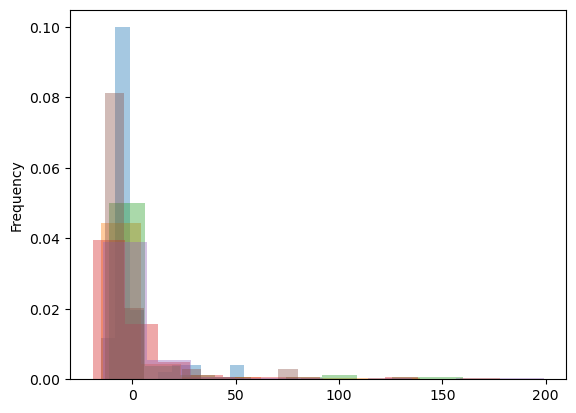

In [19]:
df.groupby("carrier")["dep_delay"].plot.hist(density=True) #, alpha=0.4)

<Axes: xlabel='carrier'>

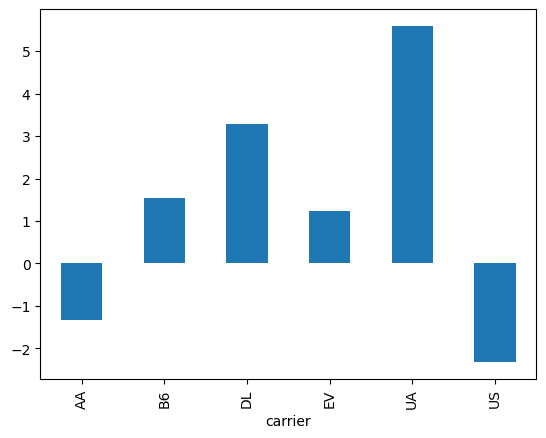

In [13]:
df.groupby("carrier")["dep_delay"].mean().plot.bar()

In [14]:
df.groupby(["carrier", "origin"])["dep_delay"].mean()

carrier  origin
AA       EWR       -3.375000
         JFK        1.771429
         LGA       -4.322581
B6       EWR       -0.823529
         JFK       -0.836735
         LGA       17.588235
DL       EWR       19.222222
         JFK        4.980000
         LGA       -1.652174
EV       EWR        1.483146
         JFK        0.000000
         LGA       -0.083333
UA       EWR        7.525773
         JFK        1.909091
         LGA       -4.928571
US       EWR       -5.000000
         JFK        5.400000
         LGA       -5.312500
Name: dep_delay, dtype: float64

<Axes: xlabel='carrier'>

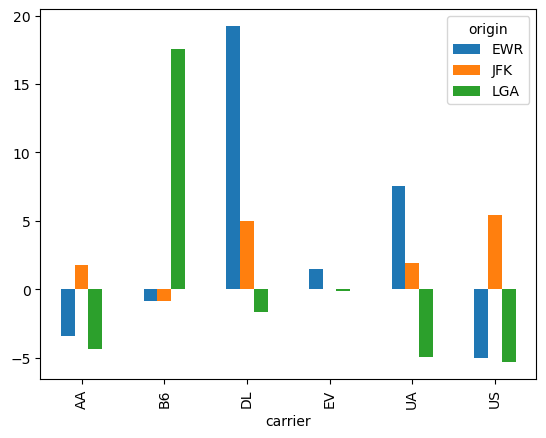

In [15]:
(df.groupby(["carrier", "origin"])["dep_delay"].mean().
 unstack("origin").
 plot.bar())

In-Class Exercise

Visualizing Conditional Distributions

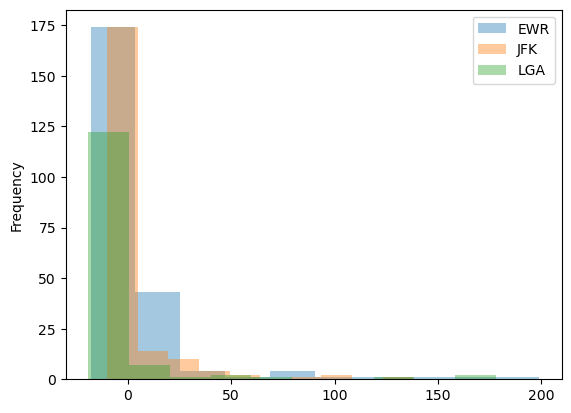

In [16]:
axes = df.groupby("origin")["dep_delay"].plot.hist(legend=True,
                                                   alpha=0.4)

In [17]:
type(axes[1])

C:\Users\fatma\AppData\Local\Temp\ipykernel_16492\3244303415.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  type(axes[1])


matplotlib.axes._axes.Axes

C:\Users\fatma\AppData\Local\Temp\ipykernel_16492\3312144746.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axes[0].set_xlabel("Departure Delay")


Text(0.5, 0, 'Departure Delay')

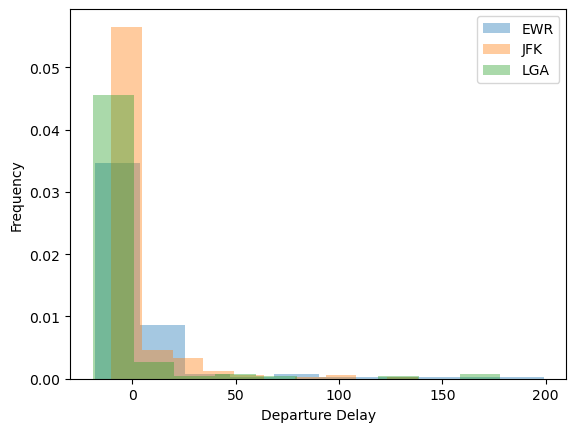

In [18]:
axes = df.groupby("origin")["dep_delay"].plot.hist(legend=True,
                                                   alpha=0.4,
                                                   density=True)
axes[0].set_xlabel("Departure Delay")